# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:140%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

 <img src ='https://entrepreneurhandbook.co.uk/wp-content/uploads/2015/08/Segmenting-a-market.jpg.webp' alt="Customer segmentation image" width="1000" height="1000">

In this notebook, I am going to perform clustering operation on the customer dataset. Cluster is a un-supervised learning technique which helps us to group the customers based on their purchase records. We can modify the products based on the need and behaviour of the customer groups. This will increase the business by particularly targetting some customer groups for a particular product.

# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Table of Content</p>

* 1. [Importing libraries](#1)
* 2. [Loading data](#2)
* 3. [Expotary Data Analysis](#3)
* 4. [Feature Engineering](#4)
* 5. [Data Preprocessing](#5)
* 6. [Dimensionality Reduction](#6)
* 7. [Decide Number of Clusters](#7)

<a id="1"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Importing libraries</p>

In [3]:
# My utils files -- which has all my pre-defined function -- i will use this in EDA and Data preprocessing
# import sys
# sys.path.append("/home/pavithra/Pictures/learning/ML/kaggle/")
# sys.path
import kaggle_utils_py as kaggle_utils

# basic 
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# clustering algorithm
from sklearn.cluster import KMeans

In [4]:
# settings i wanna do
pd.set_option('display.max_columns', None) # disaply all the columns while displaying a dataframe

<a id="2"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Loading data</p>

In [5]:
data = pd.read_csv("../input/marketingcampaign/marketing_campaign.csv", sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
print("data number of samples---->",data.shape[0])
print("data number of columns---->",data.shape[1])

data number of samples----> 2240
data number of columns----> 29


<a id="3"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Expotary Data Analysis</p>

## Describtive Analysis

In [7]:
# Common data analysis
columns, categorical_col, numerical_col  = kaggle_utils.Common_data_analysis(data, missing_value_highlight_threshold=1.0)

======================================= Common data analysis =======================================

Numerical data list ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'] ---> total 26 numerical values
Categorical data list ['Education', 'Marital_Status', 'Dt_Customer'] ---> total 3 categorical values



,data type,Missing Value(NA),?[]na null ' ',% of Missing value(NA),% of Missing value(?[]na null ' ')
ID,int64,0,0,0.000000,0.000000
Year_Birth,int64,0,0,0.000000,0.000000
Education,object,0,0,0.000000,0.000000
Marital_Status,object,0,0,0.000000,0.000000
Income,float64,24,0,1.070000,0.000000
Kidhome,int64,0,0,0.000000,0.000000
Teenhome,int64,0,0,0.000000,0.000000
Dt_Customer,object,0,0,0.000000,0.000000
Recency,int64,0,0,0.000000,0.000000
MntWines,int64,0,0,0.000000,0.000000


### Observation
- No Charector which represents missing values present in the dataset.
- Income -- has 1% missing value -- since it is very small we can simply delete the rows having missing values.
- Dt_Customer -- Column has the date value but not in Datatime object -- we can change this.
- 3 chategerical values -- need handling

In [8]:
# Numerical data analysis
kaggle_utils.numerical_data_analysis(data[numerical_col], numerical_col)

===================================== Numerical data analysis ======================================
The skewness we are calculatinf here has a value range ===
If skew is == 0 -----------> Perfect normal distribution(green color)
If skew is > +1 -----------> Highly positive skew(red color)
If skew is > -1 -----------> Highly negative skew(red color)
If  0 > skew < 0.5 --------> Moderate positive skew(blue color)
If  0 < skew > -0.5 -------> Moderate negative skew(blue color)


,min,max,range(max-min),mean/average,standard deviation,Q1,meadian/Q2,Q3,Inter quantile range,kurtosis,Skewness
ID,0.000000,11191.000000,11191.000000,5592.159821,3246.662198,2828.250000,5458.500000,8427.750000,5599.500000,-1.190028,0.039832
Year_Birth,1893.000000,1996.000000,103.000000,1968.805804,11.984069,1959.000000,1970.000000,1977.000000,18.000000,0.717464,-0.349944
Income,1730.000000,666666.000000,664936.000000,52247.251354,25173.076661,35303.000000,51381.500000,68522.000000,33219.000000,159.636700,6.763487
Kidhome,0.000000,2.000000,2.000000,0.444196,0.538398,0.000000,0.000000,1.000000,1.000000,-0.779661,0.635288
Teenhome,0.000000,2.000000,2.000000,0.506250,0.544538,0.000000,0.000000,1.000000,1.000000,-0.986235,0.407115
Recency,0.000000,99.000000,99.000000,49.109375,28.962453,24.000000,49.000000,74.000000,50.000000,-1.201897,-0.001987
MntWines,0.000000,1493.000000,1493.000000,303.935714,336.597393,23.750000,173.500000,504.250000,480.500000,0.598744,1.175771
MntFruits,0.000000,199.000000,199.000000,26.302232,39.773434,1.000000,8.000000,33.000000,32.000000,4.050976,2.102063
MntMeatProducts,0.000000,1725.000000,1725.000000,166.950000,225.715373,16.000000,67.000000,232.000000,216.000000,5.516724,2.083233
MntFishProducts,0.000000,259.000000,259.000000,37.525446,54.628979,3.000000,12.000000,50.000000,47.000000,3.096461,1.919769


### Observation
- The dataset has some large values and some with 0 and 1s -- Scaling must
- All the features having the skewness -- Outlier detection and removal needed

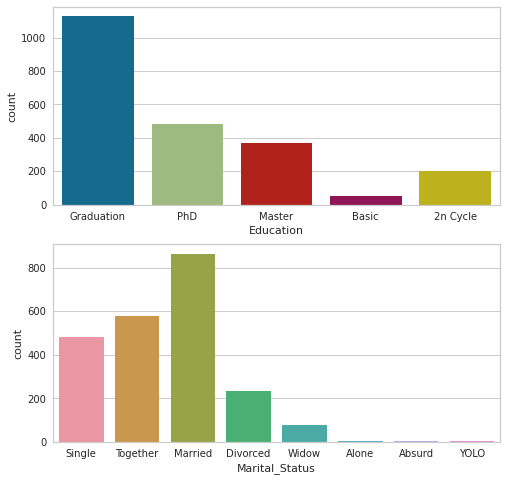

In [9]:
# Categorical data
column_plot = ['Education', "Marital_Status"]
fig, ax = plt.subplots(2,1, figsize = (8,8))
row = 2
col_count = 0
for r in range(row):
    sns.countplot(data=data, x=column_plot[col_count], ax=ax[r])
    col_count +=1

<a id="4"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Feature Engineering</p>

In this section, i am going to create some features from the exsisting features
- **Age** from Year_Birth
- **Total_childers** by adding  Kidhome and Teenhome
- **Being customer** from Dt_Customer (Dt_Customer -- represents the joing date of the customer)
- **Total purches** by adding MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds
- **Parent** -- going to be a decrete value -- 1 if they have children, 0 otherwise
- **loving product** -- which product they buy mostly outof  -- MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

### Feature removal 
- AcceptedCmpn -- columns can be removed 

In [10]:
max(data.loc[1,"MntGoldProds"],data.loc[1,"MntMeatProducts"])

6

In [11]:
# generating age.
data["Age"] = 2022 - data['Year_Birth']

# generating Total_childers
data["Total_childers"] = data["Kidhome"] + data["Teenhome"]

# Generating Being customer from  Dt_Customer
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Dt_Customer"] = data["Dt_Customer"].dt.date
today = pd.to_datetime("today").date()
data["days"] = today - data["Dt_Customer"]
data["days"] = pd.to_numeric(data["days"])/ 10**9

# Total purches
data["Total purches"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Is the customer is a parent or not
data["parent"] = np.where(data["Total_childers"] > 0 , 1 , 0)

# Which product they buy more.

data["loving product"] = data[["MntWines", "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntGoldProds"]].idxmax(axis = 1).values


In [12]:
# data removal
drop_column = ["Dt_Customer", "Year_Birth", "ID", "Z_CostContact", "Z_Revenue", 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'] 
data = data.drop(drop_column, axis=1)

<a id="5"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Data Preprocessing</p>

- Null value removal
- Outlier Detection and removal
- Categorical value to numerical value convertion
- Scaling data

### Removal of numerical values

In [13]:
# remove null values
print("Shape of the data before removal", data.shape)
data.dropna(inplace=True)
print("Shape of the data after removal", data.shape)

Shape of the data before removal (2240, 23)
Shape of the data after removal (2216, 23)


### Outlier detection and removal

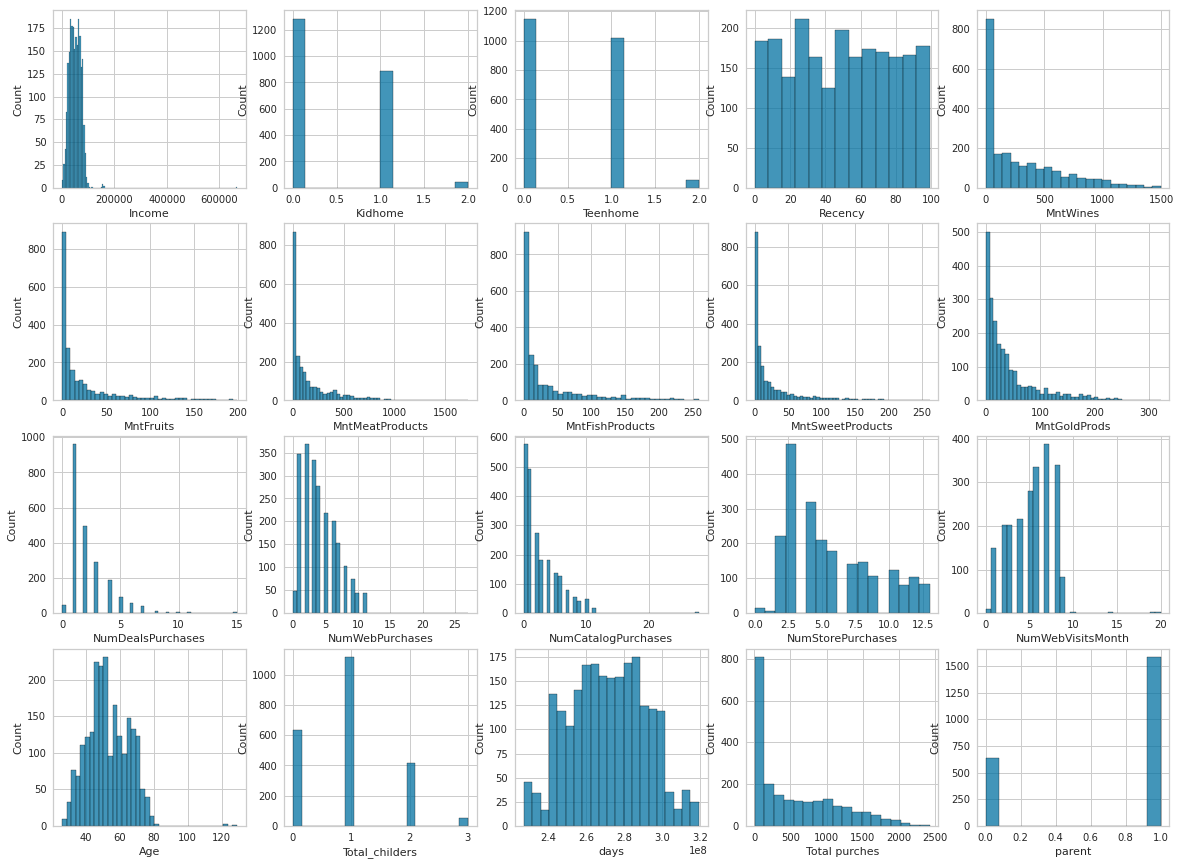

In [14]:
# outlier detection
numerical_col = data.select_dtypes(include=['int', 'float']).columns
plt.figure
fig, ax = plt.subplots(4,5, figsize=(20,15))
# we have 9 numerical values.
row, col = 4, 5
col_count = 0
for r in range(row):
    for c in range(col):
        if col_count >= len(numerical_col):
            ax[r,c].text(0.5, 0.5, "no data")
        else:
            sns.histplot(data=data, x=numerical_col[col_count], ax=ax[r,c])
        col_count +=1

- Most of the data with in a small range 
- Age having some data higher than 120 -- may be this is a outlier
- Very small datapoint in Income above 60,00,000 -- that can be a outlier here -- because we can't take decition based on that small rich customers

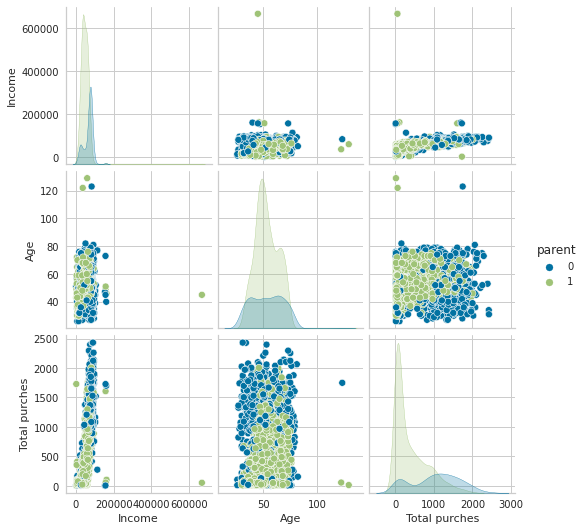

In [15]:
# so compare some selected products
col = ["Income", "Age","Total purches", "parent"]
sns.pairplot(data=data[col], hue="parent")

### observation
- Age and income having outliers -- that can be removed
- we have people they are not parents up to 40 age
- i think one or 2 datapoints having high salary

shape of the dataset after outlier removal (2212, 23)


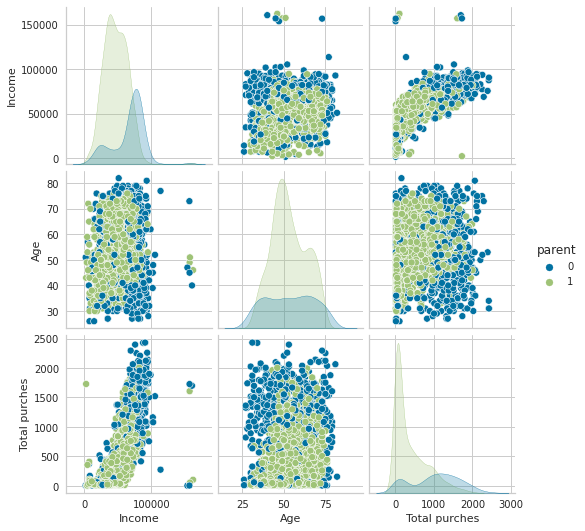

In [16]:
# outlier removal
data = data.drop(data[data["Age"] > 100].index)
data = data.drop(data[data["Income"] > 400000].index)

print("shape of the dataset after outlier removal", data.shape)

# plot the data after removal to see how this is looking
col = ["Income", "Age","Total purches", "parent"]
sns.pairplot(data=data[col], hue="parent")

### Categorical value to numerical value

<AxesSubplot:xlabel='loving product', ylabel='count'>

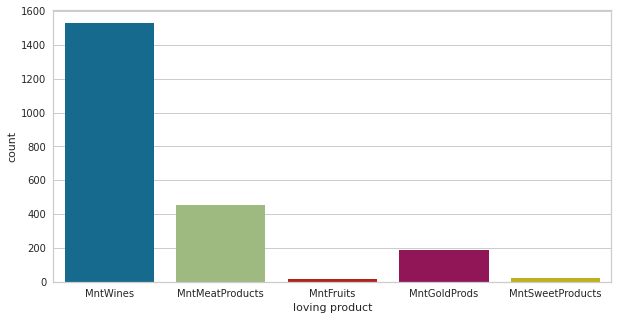

In [17]:
# befre this i wanna see which product purshed by the customer -- love Wines more than other products
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="loving product")

In [18]:
## Label encoding -- because don't want to get more features
col_to_change = ["Education", "Marital_Status", "loving product"]
label_encod = LabelEncoder()
for col in col_to_change:
    data[col] = label_encod.fit_transform(data[col])
print("Any categorical value left", data.select_dtypes(include="object").columns)

Any categorical value left Index([], dtype='object')


### Scaling feature

In [19]:
scaler = Normalizer()
data = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

In [20]:
## final data
display(data.head())
print("data number of samples---->",data.shape[0])
print("data number of columns---->",data.shape[1])

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Total_childers,days,Total purches,parent,loving product
0,6.424687e-09,1.284937e-08,0.000187,0.000000e+00,0.000000e+00,1.863159e-07,2.039838e-06,2.826862e-07,1.753940e-06,5.525231e-07,2.826862e-07,2.826862e-07,9.637031e-09,2.569875e-08,3.212344e-08,1.284937e-08,2.248640e-08,2.088023e-07,0.000000e+00,1.0,4.641836e-06,0.000000e+00,1.284937e-08
1,8.396136e-09,1.679227e-08,0.000195,4.198068e-09,4.198068e-09,1.595266e-07,4.617875e-08,4.198068e-09,2.518841e-08,8.396136e-09,4.198068e-09,2.518841e-08,8.396136e-09,4.198068e-09,4.198068e-09,8.396136e-09,2.099034e-08,2.854686e-07,8.396136e-09,1.0,1.049517e-07,4.198068e-09,1.679227e-08
2,7.457522e-09,1.864380e-08,0.000267,0.000000e+00,0.000000e+00,9.694778e-08,1.588452e-06,1.827093e-07,4.735526e-07,4.138925e-07,7.830398e-08,1.566080e-07,3.728761e-09,2.983009e-08,7.457522e-09,3.728761e-08,1.491504e-08,2.125394e-07,0.000000e+00,1.0,2.479626e-06,0.000000e+00,1.491504e-08
3,8.582925e-09,2.145731e-08,0.000114,4.291462e-09,0.000000e+00,1.115780e-07,4.720609e-08,1.716585e-08,8.582925e-08,4.291462e-08,1.287439e-08,2.145731e-08,8.582925e-09,8.582925e-09,0.000000e+00,1.716585e-08,2.574877e-08,1.630756e-07,4.291462e-09,1.0,1.845329e-07,4.291462e-09,8.582925e-09
4,1.567772e-08,1.175829e-08,0.000228,3.919429e-09,0.000000e+00,3.684263e-07,6.780612e-07,1.685354e-07,4.624926e-07,1.802937e-07,1.058246e-07,5.879143e-08,1.959714e-08,1.959714e-08,1.175829e-08,2.351657e-08,1.959714e-08,1.606966e-07,3.919429e-09,1.0,1.473705e-06,3.919429e-09,1.567772e-08


data number of samples----> 2212
data number of columns----> 23


<a id="6"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Dimensionality Reduction</p>

Dimentionality redection is a technique, which is used to reduce the number of features in the data. we are having some correlated fearures and that can be removed -- may be in that way we will lose some data. In data reduction technique we have small rock of data lose. <br>
I am going to use PCA for this now and gonna reduce to 3 features (i can plot that to)

In [21]:
# PCA
pca = PCA(n_components=3)
data = pd.DataFrame(pca.fit_transform(data))
data.head()

,0,1,2
0,-0.000006,-3.014356e-06,7.516380e-07
1,0.000002,2.382048e-06,-1.106732e-07
2,0.000075,1.183523e-06,-4.708696e-07
3,-0.000078,4.450192e-07,1.242407e-07
4,0.000036,1.596113e-06,-8.451841e-10


In [22]:
data.describe()

,0,1,2
count,2.212000e+03,2.212000e+03,2.212000e+03
mean,-7.421035e-20,-8.645001e-20,-5.363953e-19
std,8.156817e-05,1.599500e-06,6.416636e-07
min,-1.854386e-04,-8.509350e-06,-2.453377e-06
25%,-6.285675e-05,-8.126687e-07,-2.359283e-07
50%,-3.042013e-06,1.513000e-07,2.810097e-08
75%,6.096948e-05,9.711678e-07,2.005954e-07
max,4.460948e-04,1.274629e-05,5.907690e-06


<a id="7"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Decide Number of Clusters</p>

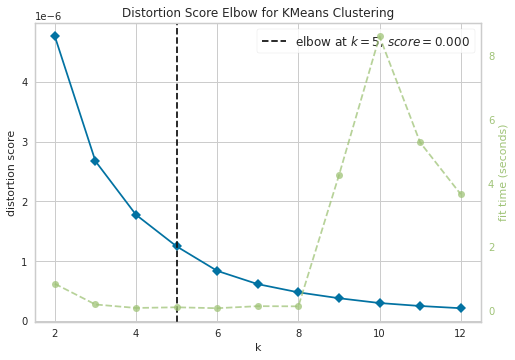

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Going to use the Elbow method to find the best number of clutser
elbo = KElbowVisualizer(KMeans(), k=12)
elbo.fit(data)
elbo.show()

- This method says 5 would be the best number of cluster to choose

<a id="8"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Clustering</p>

In [24]:
# predict the group
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# Initialize the Kmeans clustering model
data["group"] = kmeans.fit_predict(data)

In [25]:
# number of samples for each group
data["group"].value_counts()

0    662
4    640
1    480
2    422
3      8
Name: group, dtype: int64

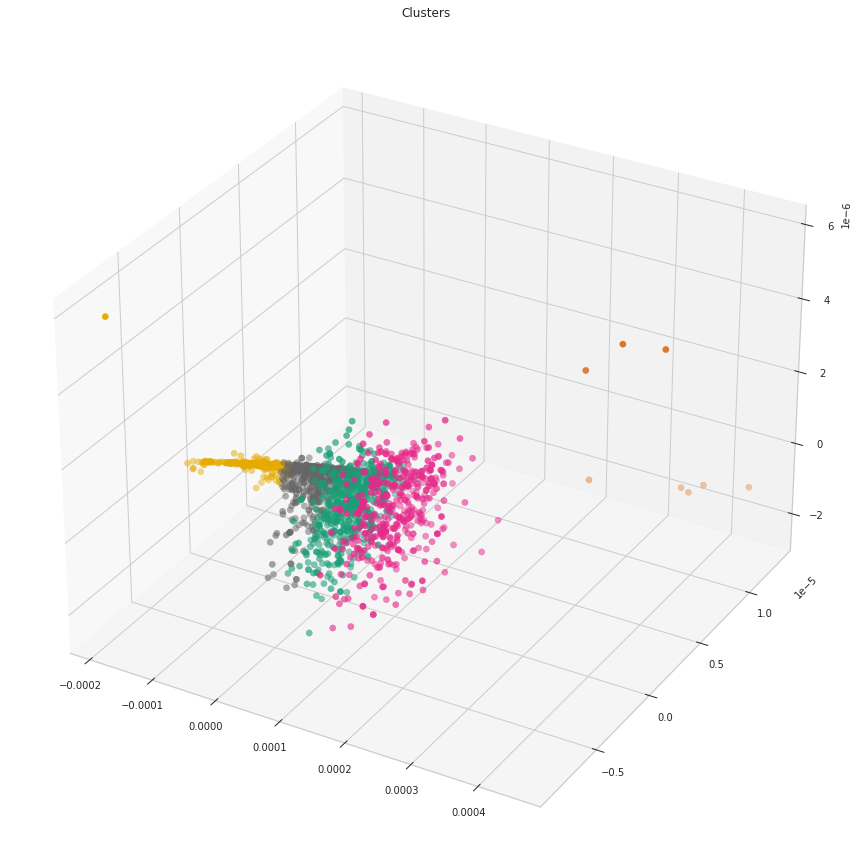

In [26]:
# plot the data
x = data[0]
y = data[1]
z = data[2]
# creating figure
fig = plt.figure(figsize = (15, 16))
ax = plt.axes(projection ="3d")

ax.scatter(x, y, z, s=40, c=data["group"], marker='o', cmap = "Dark2_r")
ax.set_title("Clusters")
plt.show()

## better understanding see the below image in different side view

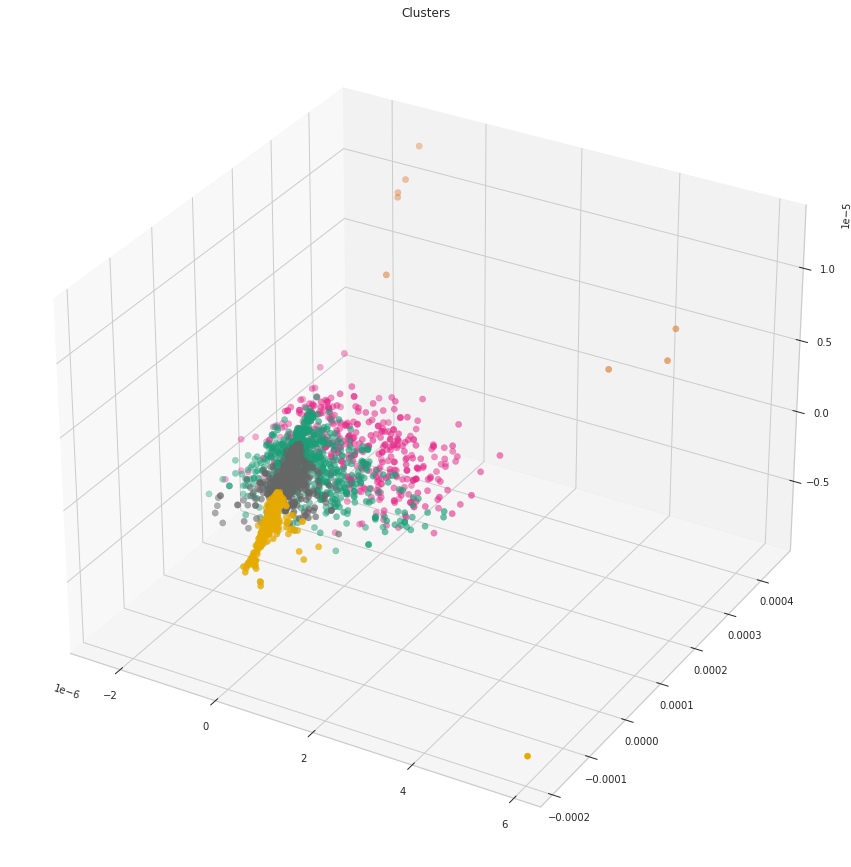

In [28]:
# plot the data
x = data[2]
y = data[0]
z = data[1]
# creating figure
fig = plt.figure(figsize = (15, 16))
ax = plt.axes(projection ="3d")

ax.scatter(x, y, z, s=40, c=data["group"], marker='o', cmap = "Dark2_r")
ax.set_title("Clusters")
plt.show()

<a id="9"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Learning Each clusters</p>

#  loading ..

<a id="9"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;">Conclusion</p>
In this notebook i did un-supervised clustering of customer data.
I used 5 clusters that i derived form the elbo method and used Kmeans for clustering.
This can be used in planning better marketing strategies. 

**<span style="color:#5811D3;"> If you like this Notebook -- please do upvote</span>**

**<span style="color:#5811D3;">If you have any questions -- Comment it</span>**


<img src='https://c.tenor.com/npsLhz89w5AAAAAC/yes-i-did-it-success.gif'>

<a id="10"></a>
# <p style="background-color:#5811D3;font-family:newtimeroman;color:#FEDFA0;font-size:100%;text-align:center;border-radius:10px 10px;"> ... END ...</p>